In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Working with Heart Disease Data

In [2]:
data = pd.read_csv("data/Heart_Disease_Prediction.csv")
np.random.seed(1)

X = data.drop("Heart Disease", axis=1)
Y = data['Heart Disease'].map({"Presence": 1, "Absence": 0})

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

model = RandomForestClassifier(random_state=42).fit(x_train, y_train)

y_pred = model.predict(x_test)      # Y_predicted value based on X_test data
y_pred_prob = model.predict_proba(x_test)           # Y Predicted Probability [0, 1]

print(f"Score of model prediction: {round(model.score(x_test, y_test)*100, 2)}%")
print(f"Accuracy score for model: {round(accuracy_score(y_pred, y_test), 2)*100}%")

Score of model prediction: 80.88%
Accuracy score for model: 81.0%


## Checking model accuracy with Cross Validation Score

In [3]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=42)
cv_score = cross_val_score(model, X, Y, cv=5)     # Accuracy score that split and check accuracy on each 20% of data and output array

print(f"Cross Validation Accuracy: {round(np.mean(accuracy_score(y_pred, y_test)*100), 2)}%")

Cross Validation Accuracy: 80.88%


## Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

In [4]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

y_pred_positive = y_pred_prob[:,1]

# Computer ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_positive)

#Compute AUC score
auc_score = round(auc(fpr, tpr) * 100, 2)

print(f"AUC score is: {auc_score}%")

AUC score is: 89.67%


## Plotting the score of AUC

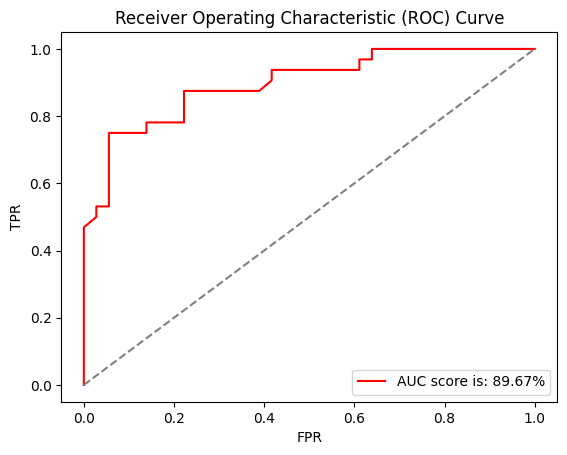

In [5]:
def auc_plot(fpr, tpr, auc_score):
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f"AUC score is: {auc_score}%", color="red")
    ax.plot([0, 1], color='grey', linestyle="--")
    ax.set(xlabel="FPR", ylabel="TPR", title="Receiver Operating Characteristic (ROC) Curve")
    ax.legend(loc="lower right")
    plt.show()

  
auc_plot(fpr, tpr, auc_score)

# Checking model with Confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix

# Checking confusion with confusion matrix module
confusion_matrix(y_test, y_pred)

# Checking confusion with pd.crosstab
pd.crosstab(y_test, y_pred, rownames=['Truth'], colnames=['Predicted'])

Predicted,0,1
Truth,,
0,30,6
1,7,25


## Confusion matrix plot

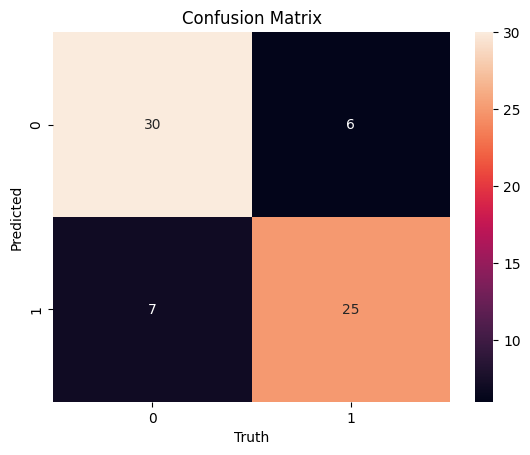

In [7]:
import seaborn as sns

confusion_data = confusion_matrix(y_test, y_pred)

# Create a plot with heatmap
def confusion_plot(data):
    fig, ax = plt.subplots()
    ax = sns.heatmap(data, annot=True, cbar=True)
    ax.set(xlabel='Truth', ylabel='Predicted', title="Confusion Matrix")
    
confusion_plot(confusion_data)

# Classification Report:
### > Class Imbalance
### > Recall
### > Precision
### > F1-Score

In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.81      0.78      0.79        32

    accuracy                           0.81        68
   macro avg       0.81      0.81      0.81        68
weighted avg       0.81      0.81      0.81        68



## Working with Regression Model for R^2
### > Mean Absolute Error
### > Mean Squared Error

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f"Model Accuracy: {model.score(x_test, y_test)*100:.2f}%")

print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

Model Accuracy: 48.62%
Mean Absolute Error: 0.2596296296296296


In [10]:
# Checking the Mean_Absolute_Error using DataFrame

differ_data = pd.DataFrame(data={'Actual Values': y_test,
                  'Predicted Values': y_pred,
                  'Difference': y_test - y_pred})      # This shows how wrong our model is - Minimize this value

differ_data.head()

mae = np.array(differ_data['Difference']).mean()
mae

0.005555555555555551

In [11]:
# Checking the Mean Squared Error using our DataFrame

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Result using MSE       : {mse}")

# Using Manual method to calculate the Mean Squared Error

mse_manual = np.square(differ_data['Difference'])
print(f"Result with manual MSE : {mse_manual.mean()}")

Result using MSE       : 0.12562592592592592
Result with manual MSE : 0.12562592592592592


## Scoring parameter for Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(1)

X = data.drop('Heart Disease', axis=1)
Y = data['Heart Disease'].map({"Presence": 1, "Absence": 0})

model = RandomForestClassifier()

accuracy = cross_val_score(model, X, Y, cv=5, scoring=None)
print(f"Accuracy is   : {accuracy.mean():.2f}%")

# Working with Scoring - Recall
recall = cross_val_score(model, X, Y, cv=5, scoring='recall')
print(f"Recall is     : {recall.mean():.2f}%")

# Working with Scoring - Precision
precision = cross_val_score(model, X, Y, cv=5, scoring='precision')
print(f"Precision is  : {precision.mean():.2f}%")

Accuracy is   : 0.82%
Recall is     : 0.75%
Precision is  : 0.83%


## Scoring parameters for Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
np.random.seed(1)

boston = pd.read_csv('data/boston.csv')
boston.head()

X = boston.drop('MEDV', axis=1)
Y = boston['MEDV']

model = RandomForestRegressor()

# Using the R^2 scoring parameter
cvs = cross_val_score(model, X, Y, cv=5, scoring='r2').mean()
print(f"Accuracy is      : {cvs*100:.2f}%")

# Trying some other parameters for scoring
# neg_mean_absolute_error
neg_mean = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_absolute_error').mean()
print(f"Negative Ab Mean : {neg_mean:.2f}")

# neg_mean_squared_error
neg_mean_s = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error').mean()
print(f"Negative Ab Mean : {neg_mean_s:.2f}")


Accuracy is      : 62.14%
Negative Ab Mean : -3.04
Negative Ab Mean : -21.22


## Classification model evaluation using functions

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.random.seed(1)

data = pd.read_csv("data/Heart_Disease_Prediction.csv")
X = data.drop('Heart Disease', axis=1)
Y = data['Heart Disease'].map({"Presence": 1, "Absence": 0})

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f"Simple Accuracy is: {model.score(x_test, y_test)*100:.2f}% \n")

print(f"Accuracy Score    : {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision Score   : {precision_score(y_test, y_pred)*100:.2f}%")
print(f"Recall Score      : {recall_score(y_test, y_pred)*100:.2f}%")
print(f"F1 Score          : {f1_score(y_test, y_pred)*100:.2f}%")

Simple Accuracy is: 79.63% 

Accuracy Score    : 79.63%
Precision Score   : 77.27%
Recall Score      : 73.91%
F1 Score          : 75.56%


## Regression model evaluation using functions

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
np.random.seed(7)

boston = pd.read_csv('data/boston.csv')
X = boston.drop('MEDV', axis=1)
Y = boston['MEDV']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor().fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f"R2 Score is     : {r2_score(y_test, y_pred)}")
print(f"Mean Ab error   : {mean_absolute_error(y_test, y_pred)}")
print(f"Mean SQ error   : {mean_squared_error(y_test, y_pred)}")

R2 Score is     : 0.8092443411593175
Mean Ab error   : 2.3153627450980383
Mean SQ error   : 15.414251382352935


## Tuning Hyperparameters for Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

data = pd.read_csv("data/Heart_Disease_Prediction.csv")

X = data.drop('Heart Disease', axis=1)
Y = data['Heart Disease'].map({"Presence": 1, "Absence": 0})

# FIRST=1. Splitting data into three parts, 70% Train - Validate 15% - Test 15% (WAY 1)

train_split = round(0.7 * len(data))
valid_split = round(train_split + 0.15 * len(data))

x_train, y_train = X[:train_split], Y[:train_split]
x_valid, y_valid = X[train_split:valid_split], Y[train_split:valid_split]
x_test, y_test = X[valid_split:], Y[valid_split:]


print(f"Length of Data: {len(data)}")

len(x_train), len(x_valid), len(x_test)

Length of Data: 270


(189, 41, 40)

In [17]:
# SECOND=2. Splitting data into three parts, 70% Train - Validate 15% - Test 15% (WAY 2)

x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

print(f"Length of Data: {len(data)}")
print(len(x_train), len(x_val) ,len(x_test))
print(len(y_train), len(y_val) ,len(y_test))

# pd.DataFrame(x_temp)

Length of Data: 270
189 40 41
189 40 41


## Evaluation Metrics in one function (Classification & Regressor)

In [18]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss,
    r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, median_absolute_error
)

# Evaluation metrics for classification
def classifier_evaluation(y_test, y_pred, y_pred_prob):
    """Classification Metrics"""
    print(f"Accuracy          : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision         : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall            : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score          : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC           : {roc_auc_score(y_test, y_pred_prob):.4f}")
    print(f"Confusion Matrix  :\n{confusion_matrix(y_test, y_pred)}")
    print(f"Log Loss          : {log_loss(y_test, y_pred_prob):.4f}")

# Evaluation metrics for regression
def regressor_evaluation(y_test, y_pred):
    """Regression Metrics"""
    print(f"R² Score                       : {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Absolute Error            : {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"Mean Squared Error             : {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Root Mean Squared Error        : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"Mean Absolute Percentage Error : {mean_absolute_percentage_error(y_test, y_pred):.4f}")
    print(f"Median Absolute Error          : {median_absolute_error(y_test, y_pred):.4f}")

In [20]:
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/Heart_Disease_Prediction.csv')

X = data.drop('Heart Disease', axis=1)
Y = data['Heart Disease'].map({"Presence": 1, "Absence": 0})

x_train, x_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5)

model = RandomForestClassifier().fit(x_train, y_train)

y_pred = model.predict(x_valid)
y_pred_prob = model.predict_proba(x_valid)[:,1]

classifier_evaluation(y_valid, y_pred, y_pred_prob)

Accuracy          : 0.9250
Precision         : 0.9375
Recall            : 0.8824
F1 Score          : 0.9091
ROC-AUC           : 0.9783
Confusion Matrix  :
[[22  1]
 [ 2 15]]
Log Loss          : 0.2509


## Tunning the model with Hyperparameters with RSCV (RandomizedSearchCV)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

data = pd.read_csv("data/Heart_Disease_Prediction.csv")

X = data.drop('Heart Disease', axis=1)
Y = data['Heart Disease'].map({"Presence": 1, "Absence": 0})

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = RandomForestClassifier(n_jobs=-1)

param_dist = {
    'n_estimators': [100, 200, 500, 1000, 2000],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['log2', 'sqrt']
}

rscv_model = RandomizedSearchCV(estimator=model,
                               param_distributions=param_dist,
                               n_iter=10,
                               cv=5,
                               verbose=1,
                               random_state=42,
                               n_jobs=-1)

rscv_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000]},
                   random_state=42, verbose=1)

In [51]:
rscv_y_pred = rscv_model.predict(x_test)
rscv_y_pred_proba = rscv_model.predict_proba(x_test)[:,1]

print(f"Model Accuracy is: {accuracy_score(y_test, rscv_y_pred)*100:.2f}% \n")
print(f"Best params found: {rscv_model.best_params_}")

Model Accuracy is: 86.42% 

Best params found: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [54]:
classifier_evaluation(y_test, rscv_y_pred, rscv_y_pred_proba)

# rscv_model.best_params_

Accuracy          : 0.8642
Precision         : 0.8611
Recall            : 0.8378
F1 Score          : 0.8493
ROC-AUC           : 0.9232
Confusion Matrix  :
[[39  5]
 [ 6 31]]
Log Loss          : 0.3627


## Tunning the model with Hyperparameters with GSCV (GridSearchCV)

In [58]:
from sklearn.model_selection import GridSearchCV

param_dist = {'n_estimators': [80, 100, 140],
             'min_samples_split': [4, 6, 8],
             'min_samples_leaf': [1, 2],
             'max_features': ['log2'],
             'max_depth': [None, 10]
             }

model = RandomForestClassifier(n_jobs=-1)
gscv_model = GridSearchCV(estimator=model, param_grid=param_dist, cv=5, verbose=1, n_jobs=-1)

gscv_model.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'max_features': ['log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [80, 100, 140]},
             verbose=1)

In [63]:
y_pred = gscv_model.predict(x_test)
y_pred_prob = gscv_model.predict_proba(x_test)[:,1]

classifier_evaluation(y_test, y_pred, y_pred_prob)
gscv_model.best_params_

Accuracy          : 0.8765
Precision         : 0.8649
Recall            : 0.8649
F1 Score          : 0.8649
ROC-AUC           : 0.9238
Confusion Matrix  :
[[39  5]
 [ 5 32]]
Log Loss          : 0.3721


{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 80}

In [64]:
import pickle

pickle.dump(gscv_model, open('Heart_Disease_Prediction_GSCV_CLF.pkl', 'wb'))

In [68]:
pickled_model = pickle.load(open('Heart_Disease_Prediction_GSCV_CLF.pkl', 'rb'))
pickled_model.predict(x_test)

pickled_model.score(x_test, y_test)

0.8765432098765432

In [70]:
import joblib

joblib.dump(rscv_model, filename="HDP_GSCV_CLF.joblib")

['HDP_GSCV_CLF.joblib']

In [72]:
rscv_joblib = joblib.load(filename="HDP_GSCV_CLF.joblib")

In [74]:
rscv_joblib.score(x_test, y_test)

0.8641975308641975